In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# cot_path = f"./gpt-3.5-turbo-0301_below_average.csv"
cot_path = f"./gpt-3.5-turbo-0613.csv"
cot_lr_path = f"./gpt-3.5-turbo-0613_lr.csv" # 8 new tasks about logical reasoning



cot_df = pd.read_csv(cot_path)
cot_lr_df = pd.read_csv(cot_lr_path)

cot_df = cot_df.drop_duplicates()
cot_lr_df = cot_lr_df.drop_duplicates()
model = cot_df['model_family'].unique()[0]
cot_df = cot_df.drop(columns=["model_family", "checkpoint", "batch_size", "loading_precision", "seed", "sample", "scoring_method", "prompting_method", "mask_strategy", "mask_accuracy"])
cot_lr_df = cot_lr_df.drop(columns=["model_family", "checkpoint", "batch_size", "loading_precision", "seed", "sample", "scoring_method", "prompting_method", "mask_strategy", "mask_accuracy"])
# cot_df = cot_df.drop(columns=["checkpoint", "batch_size", "loading_precision", "seed", "sample", "scoring_method", "prompting_method", "mask_strategy", "mask_accuracy"])
# cot_df = cot_df.drop(columns=["model_family", "checkpoint", "batch_size", "loading_precision", "seed", "sample", "scoring_method", "prompting_method", "mask_strategy", "mask_accuracy"])
# cot_df.to_csv(f"{model}_cot.csv", index=False)

cot_df = pd.concat([cot_df, cot_lr_df])

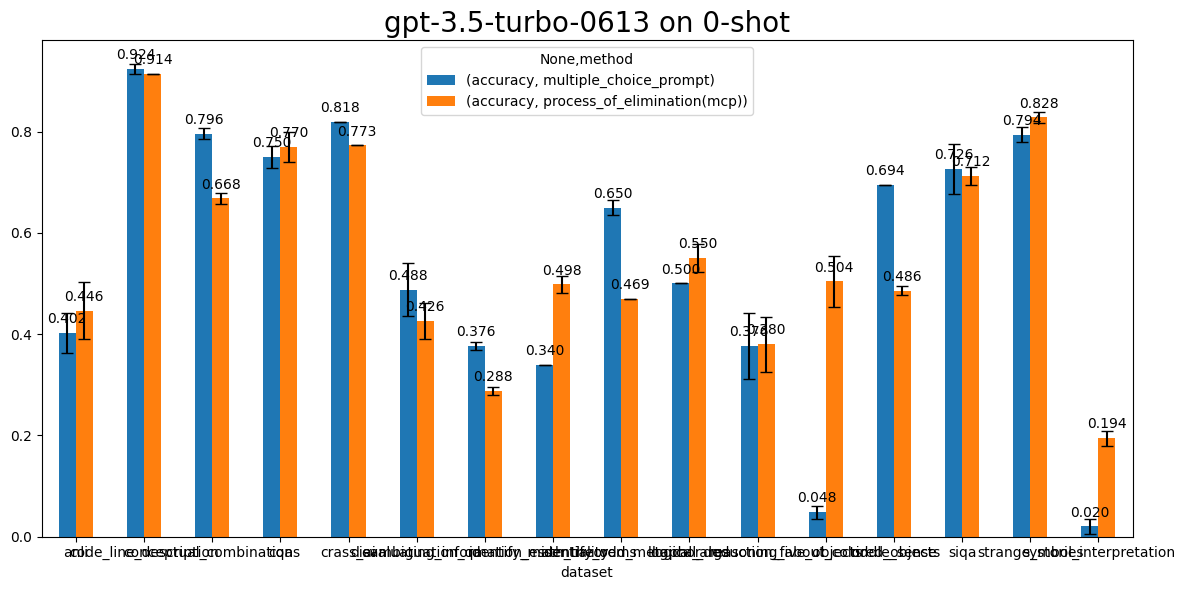

In [15]:
datasets = ["logical_deduction_five_objects", 
            "conceptual_combinations", 
            "strange_stories", 
            "symbol_interpretation",
            "cqa", 
            "siqa",
            "anli",
            "disambiguation_qa",
            ]
datasets+="code_line_description reasoning_about_colored_objects crass_ai evaluating_information_essentiality identify_math_theorems identify_odd_metaphor logical_args riddle_sense".split()
n_shot = 0 # 3
vis_df = cot_df[cot_df["dataset"].isin(datasets) & (cot_df["n_shot"] == n_shot)]
# drop n_shot column
vis_df = vis_df.drop(columns=["n_shot"])

fig, ax = plt.subplots(figsize=(12, 6))

vis_df = vis_df.groupby(['dataset', 'method'])
# vis_df = vis_df.groupby(['dataset', 'n_shot', 'method'])
vis_mean = vis_df.mean().unstack()
vis_std = vis_df.std().unstack()

vis_mean.plot.bar(yerr=vis_std, ax=ax, capsize=4, rot=0,)
# add title
ax.set_title(f"{model} on {n_shot}-shot", fontsize=20)
# plot numbers on each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.savefig(f"{model}_{n_shot}_shot.png")


In [16]:
temp_df = vis_mean.copy()
temp_df.columns = temp_df.columns.droplevel(0)
temp_df = temp_df.reset_index()
# temp_df = temp_df.drop(columns=["method"])
# rename columns
temp_df = temp_df.rename(columns={"dataset": "Task", 
                                  "multiple_choice_prompt": "MCP",
                                  "process_of_elimination(mcp)": "PoE"})
# remove method
# temp_df = temp_df.drop(columns=["method"])

temp_df = temp_df.set_index("Task")
temp_df = temp_df.rename(
                          index={"anli":"ANLI",
                                "cqa": "CQA",
                                "siqa": "SIQA",
                                "logical_deduction_five_objects": "LD", #
                                "disambiguation_qa": "DQA",
                                "conceptual_combinations": "CC", #
                                "strange_stories": "SS",
                                "symbol_interpretation": "SIT",
                                "logical_args":"LA", #
                                "identify_math_theorems": "IMT", #
                                "code_line_description": "CLD", #
                                "reasoning_about_colored_objects": "RACO", #
                                "crass_ai": "CAI",
                                "evaluating_information_essentiality": "EIE",
                                "identify_odd_metaphor": "IOM",
                                "riddle_sense": "RS",
                                "identify_odd_metaphor": "IOM",
                                })


temp_df = temp_df.reset_index()
# MCP: to percentage and 3 decimal places
temp_df["MCP"] = temp_df["MCP"].apply(lambda x: f"{x*100:.1f}")
temp_df["PoE"] = temp_df["PoE"].apply(lambda x: f"{x*100:.1f}")

# compute difference: PoE - MCP
temp_df["PoE - MCP"] = temp_df["PoE"].astype(float) - temp_df["MCP"].astype(float)

# sort by PoE-MCP, descending
temp_df = temp_df.sort_values(by=["PoE - MCP"], ascending=False)

# save to csv
temp_df.to_csv(f"{model}_{n_shot}_shot.csv", index=False)
# save to markdown
temp_df.to_markdown(f"{model}_{n_shot}_shot.md", index=False)

In [13]:
# keep tasks: "ANLI", "CQA","SIQA","LD", "DQA","CC", "SS","SIT",
original_df = temp_df[temp_df["Task"].isin(["ANLI", "CQA","SIQA","LD", "DQA","CC", "SS","SIT",])]
# rearrange rows according to task:"ANLI", "CQA","SIQA","LD", "DQA","CC", "SS","SIT",



# to csv
original_df.to_csv(f"{model}_{n_shot}_shot_original.csv", index=False)
# to markdown
original_df.to_markdown(f"{model}_{n_shot}_shot_original.md", index=False)

In [11]:
# keep tasks: "LD", "CC", "LA", "IMT","CLD", "RACO", 
lr_df = temp_df[temp_df["Task"].isin(["LA", "IMT","CLD", "RACO", ])]

# to csv
lr_df.to_csv(f"{model}_{n_shot}_shot_lr.csv", index=False)
# to markdown
lr_df.to_markdown(f"{model}_{n_shot}_shot_lr.md", index=False)

In [13]:
datasets = ["cqa", "siqa"]
n_shot = 0
vis_df = cot_df[(cot_df["dataset"].isin(datasets)) & (cot_df["n_shot"] == n_shot)]

vis_df = vis_df.groupby(['dataset', 'n_shot', 'method'])
vis_mean = vis_df.mean().unstack()
vis_std = vis_df.std().unstack()

for df in [vis_mean, vis_std]:
    df.columns = df.columns.droplevel(0)
    # convert to percentage
    df['multiple_choice_prompt'] = df['multiple_choice_prompt'] * 100
    df['process_of_elimination(mcp)'] = df['process_of_elimination(mcp)'] * 100
    # rename index and columns
    df.index = ["CQA", "SIQA"]
    df.columns = ["MCP", "PoE"]


fig, ax = plt.subplots(figsize=(12, 6))
font_size=15
h_lines = [20, 40, 60] 
vis_mean.plot.bar(yerr=vis_std, 
                  ax=ax, 
                  capsize=4, 
                  rot=0,
                  colormap="tab20",)

# set legend and other stuff
ax.legend(loc='upper center', ncol=2, fontsize=font_size)
ax.set_ylabel("Accuracy (%)", fontsize=font_size, weight='bold')
ax.set_xticklabels(["CQA", "SIQA"], fontsize=font_size, weight='bold')
ax.set_yticklabels([f"{int(tick)}" for tick in ax.get_yticks()], fontsize=font_size)
ax.set_title("Zero-Shot Tasks", fontsize=font_size, weight='bold')
# plot numbers on each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", 
                (p.get_x() + p.get_width() / 2., p.get_height() - 7), 
                color='white',
                fontsize=font_size,
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
for line in h_lines:
    ax.axhline(line, color="black", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("llm_0_shot.png", dpi=300, bbox_inches='tight')

KeyError: 'n_shot'

In [52]:
ax.get_yticks()

array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.])

In [8]:
# to produce latex table.


# post processing in latex: repalce table with table*
# add \hline

# change format, and concatenate two strings.
sing_all = vis_mean.applymap(lambda x: f"{x*100:.1f}") + vis_std.applymap(lambda x: f"\\textsubscript{{{x*100:.1f}}}")
method_index = [
                ('accuracy',    'multiple_choice_prompt'), 
                ('accuracy',    'process_of_elimination(mcp)'),]
sing_all = sing_all.reindex(method_index, axis="columns")


latex_means = sing_all.rename(columns={
                                         "multiple_choice_prompt": "MCP",
                                         "process_of_elimination(mcp)": "PoE",
                                         },
                                      #    index={0: "0 shot", 3.0: "3 shot"}
                                       )

latex_means.index = latex_means.index.set_names(["Dataset", "N Shot"])
# transpose the table
# latex_means = latex_means.transpose()

latex_means.style.to_latex(
    buf=f"llm.tex",
    column_format="lcccc",
    position="h",
    position_float="centering",
    label="tab:llm",
    caption="PoE on ChatGPT.",
    multicol_align="c",
    multirow_align="c",
)